In [14]:
%pip install pandas
%pip install matplotlib
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.


In [20]:
import pandas as pd
#Loading and cleaniing the not needed columns
# Load the dataset
df = pd.read_csv('train.csv')
#Dropping the name, ticket, cabin and passengerId because they are not needed UWU
df_cleaned = df.drop(columns=['Name', 'Ticket', 'Cabin', 'PassengerId'])
# Impute missing Age values with the median age
df_cleaned['Age'].fillna(df_cleaned['Age'].median(), inplace=True)

# Impute missing Embarked values with the mode (most frequent value)
df_cleaned['Embarked'].fillna(df_cleaned['Embarked'].mode()[0], inplace=True)

print(df_cleaned.isnull().sum()) 
print(df_cleaned)

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64
     Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0           0       3    male  22.0      1      0   7.2500        S
1           1       1  female  38.0      1      0  71.2833        C
2           1       3  female  26.0      0      0   7.9250        S
3           1       1  female  35.0      1      0  53.1000        S
4           0       3    male  35.0      0      0   8.0500        S
..        ...     ...     ...   ...    ...    ...      ...      ...
886         0       2    male  27.0      0      0  13.0000        S
887         1       1  female  19.0      0      0  30.0000        S
888         0       3  female  28.0      1      2  23.4500        S
889         1       1    male  26.0      0      0  30.0000        C
890         0       3    male  32.0      0      0   7.7500        Q

[891 rows x 8 columns]


/var/folders/nb/2k8dc4492733qs3nrwx09t500000gn/T/ipykernel_2734/241366744.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned['Age'].fillna(df_cleaned['Age'].median(), inplace=True)
/var/folders/nb/2k8dc4492733qs3nrwx09t500000gn/T/ipykernel_2734/241366744.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are sett

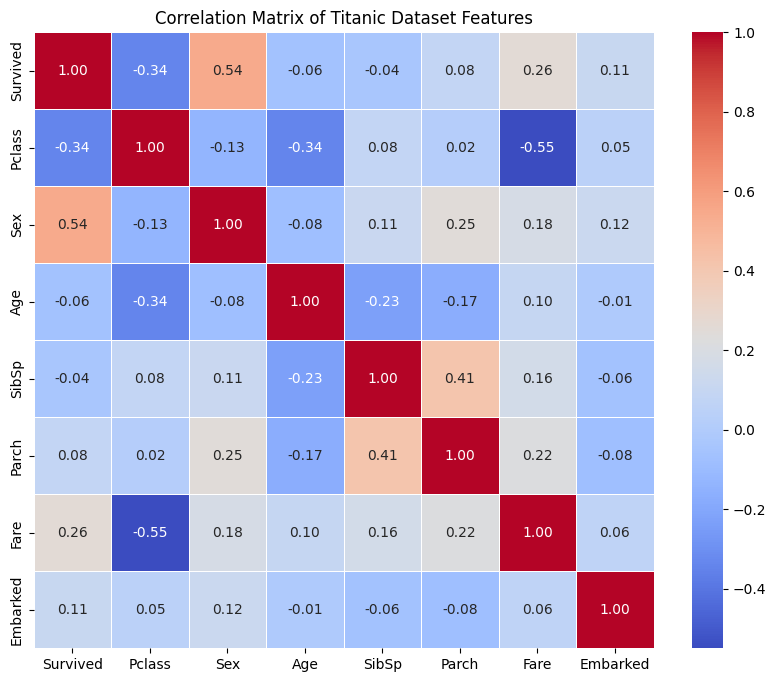

In [21]:
import matplotlib.pylab as plt
import seaborn as sns
#Correlation Matrix
df_encoded = df_cleaned.copy()
df_encoded['Sex'] = df_encoded['Sex'].map({'male': 0, 'female': 1})
df_encoded['Embarked'] = df_encoded['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
correlation_matrix = df_encoded.corr()

# Using seaborn to create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Titanic Dataset Features')
plt.show()
